<h1>ELEC ACTIVITY 2</h1>

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
blow =pd.read_csv("uk_accident_data.csv")

In [7]:
blow

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,23/02/2022,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


Descriptive Analytics

In [4]:
blow.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [5]:
blow.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,660654.0,52.553866,1.406922,49.914430,51.490690,52.315641,53.453452,60.757544
Longitude,660653.0,-1.431210,1.383330,-7.516225,-2.332291,-1.411667,-0.232869,1.762010
Number_of_Casualties,660679.0,1.357040,0.824847,1.000000,1.000000,1.000000,1.000000,68.000000
Number_of_Vehicles,660679.0,1.831255,0.715269,1.000000,1.000000,2.000000,2.000000,32.000000


filtering data

In [6]:
blow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Index                    660679 non-null  object 
 1   Accident_Severity        660679 non-null  object 
 2   Accident Date            660679 non-null  object 
 3   Latitude                 660654 non-null  float64
 4   Light_Conditions         660679 non-null  object 
 5   District Area            660679 non-null  object 
 6   Longitude                660653 non-null  float64
 7   Number_of_Casualties     660679 non-null  int64  
 8   Number_of_Vehicles       660679 non-null  int64  
 9   Road_Surface_Conditions  659953 non-null  object 
 10  Road_Type                656159 non-null  object 
 11  Urban_or_Rural_Area      660664 non-null  object 
 12  Weather_Conditions       646551 non-null  object 
 13  Vehicle_Type             660679 non-null  object 
dtypes: f

<h1>Filling up null values</h1>

In [7]:
blow.isnull().sum()

Index                          0
Accident_Severity              0
Accident Date                  0
Latitude                      25
Light_Conditions               0
District Area                  0
Longitude                     26
Number_of_Casualties           0
Number_of_Vehicles             0
Road_Surface_Conditions      726
Road_Type                   4520
Urban_or_Rural_Area           15
Weather_Conditions         14128
Vehicle_Type                   0
dtype: int64

In [8]:
blow["Latitude"] = blow["Latitude"].fillna(blow["Latitude"].mean())
blow["Longitude"] = blow["Longitude"].fillna(blow["Longitude"].mean())
blow["Road_Surface_Conditions"] = blow["Road_Surface_Conditions"].fillna(blow["Road_Surface_Conditions"].mode()[0])
blow["Road_Type"] = blow["Road_Type"].fillna(blow["Road_Type"].mode()[0])
blow["Urban_or_Rural_Area"] = blow["Urban_or_Rural_Area"].fillna(blow["Urban_or_Rural_Area"].mode()[0])
blow["Weather_Conditions"] = blow["Weather_Conditions"].fillna(blow["Weather_Conditions"].mode()[0])
blow.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
dtype: int64

In [9]:
blow["Index"] = blow["Index"].astype("category")
blow["Accident_Severity"] = blow["Accident_Severity"].astype("category")
blow["Light_Conditions"] = blow["Light_Conditions"].astype("category")
blow["District Area"] = blow["District Area"].astype("category")
blow["Road_Surface_Conditions"] = blow["Road_Surface_Conditions"].astype("category")
blow["Road_Type"] = blow["Road_Type"].astype("category")
blow["Urban_or_Rural_Area"] = blow["Urban_or_Rural_Area"].astype("category")
blow["Weather_Conditions"] = blow["Weather_Conditions"].astype("category")
blow["Vehicle_Type"] = blow["Vehicle_Type"].astype("category")
blow.dtypes

Index                      category
Accident_Severity          category
Accident Date                object
Latitude                    float64
Light_Conditions           category
District Area              category
Longitude                   float64
Number_of_Casualties          int64
Number_of_Vehicles            int64
Road_Surface_Conditions    category
Road_Type                  category
Urban_or_Rural_Area        category
Weather_Conditions         category
Vehicle_Type               category
dtype: object

In [10]:
blow[blow["Accident_Severity"] == "Serious"]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05/06/2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02/07/2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26/08/2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,Single carriageway,Urban,Fine no high winds,Taxi/Private hire car
3,200701BS66128,Serious,16/08/2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
5,200701BS67159,Serious,18/09/2019,51.497750,Daylight,Kensington and Chelsea,-0.192556,2,3,Dry,Single carriageway,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660629,201091NL00686,Serious,11/02/2022,57.687933,Daylight,Shetland Islands,-4.176860,1,2,Dry,Single carriageway,Rural,Fine + high winds,Car
660645,201091NL05842,Serious,18/10/2022,60.162660,Daylight,Shetland Islands,-1.165232,1,1,Dry,Single carriageway,Rural,Fine + high winds,Car
660672,201091NM01085,Serious,29/01/2022,57.170725,Daylight,Highland,-3.852421,1,2,Snow,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,23/02/2022,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [11]:
blow[blow["Accident_Severity"] == "Fatal"]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
7,200701BS67370,Fatal,03/10/2019,51.482260,Darkness - lights lit,Kensington and Chelsea,-0.179486,3,2,Dry,Single carriageway,Urban,Fine no high winds,Car
11,200701BS67747,Fatal,02/11/2019,51.499127,Daylight,Kensington and Chelsea,-0.159652,1,2,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
20,200701BS68301,Fatal,24/10/2019,51.505996,Daylight,Kensington and Chelsea,-0.214277,1,1,Dry,Single carriageway,Urban,Fine no high winds,Car
21,200701BS68302,Fatal,24/11/2019,51.486795,Daylight,Kensington and Chelsea,-0.170375,5,1,Dry,Single carriageway,Urban,Fine no high winds,Car
717,200701CP00032,Fatal,30/01/2019,51.510978,Daylight,City of London,-0.107581,1,2,Wet or damp,Dual carriageway,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660470,201091NH00529,Fatal,29/01/2022,58.475726,Daylight,Western Isles,-6.278583,1,1,Wet or damp,Single carriageway,Rural,Fine + high winds,Car
660519,201091NJ01533,Fatal,02/02/2022,58.495554,Daylight,Highland,-4.451628,1,1,Snow,Single carriageway,Rural,Snowing no high winds,Car
660565,201091NJ11329,Fatal,15/08/2022,57.871514,Daylight,Highland,-4.243081,1,1,Dry,Single carriageway,Rural,Fine no high winds,Goods 7.5 tonnes mgw and over
660581,201091NJ14695,Fatal,21/10/2022,58.445475,Darkness - lights lit,Highland,-3.065535,1,1,Wet or damp,Single carriageway,Rural,Fine no high winds,Car


In [12]:
blow[blow["Accident_Severity"] == "Slight"]

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
4,200701BS66837,Slight,03/09/2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,Single carriageway,Urban,Fine no high winds,Other vehicle
8,200701BS67515,Slight,31/10/2019,51.493319,Darkness - lights lit,Kensington and Chelsea,-0.173572,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
9,200701BS67543,Slight,18/10/2019,51.484539,Daylight,Kensington and Chelsea,-0.175651,1,2,Dry,Single carriageway,Urban,Fine no high winds,Motorcycle over 125cc and up to 500cc
13,200701BS67853,Slight,08/11/2019,51.508999,Darkness - lights lit,Kensington and Chelsea,-0.210701,3,2,Wet or damp,Single carriageway,Urban,Other,Car
14,200701BS67859,Slight,01/11/2019,51.485125,Darkness - lights lit,Kensington and Chelsea,-0.167129,1,1,Dry,One way street,Urban,Fine no high winds,Car
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660671,201091NM01053,Slight,29/01/2022,57.572162,Daylight,Highland,-3.930799,1,1,Frost or ice,Single carriageway,Rural,Other,Van / Goods 3.5 tonnes mgw or under
660673,201091NM01190,Slight,02/02/2022,57.585152,Daylight,Highland,-3.748312,2,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Car
660674,201091NM01760,Slight,18/02/2022,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,21/02/2022,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car


1. What is the distribution of accident severity?

In [13]:
blow["Accident_Severity"].value_counts()

Accident_Severity
Slight     563801
Serious     88217
Fatal        8661
Name: count, dtype: int64

Insight: Majority of accidents are slight, while fatal accidents are rare

2. What is the most common road surface condition?

In [14]:
blow.groupby("Road_Surface_Conditions").size()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1896\2392403623.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blow.groupby("Road_Surface_Conditions").size()


Road_Surface_Conditions
Dry                     448547
Flood over 3cm. deep      1017
Frost or ice             18517
Snow                      5890
Wet or damp             186708
dtype: int64

Insight: Almost 7 out of 10 accidents occur on dry roads, but wet/icy conditions have higher risk per exposure.

3. What are the most common light conditions?

In [15]:
blow["Light_Conditions"].value_counts()


Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

Insight: Most accidents occur during daylight, but accidents at night with no lighting are far more severe.

4. How many accidents occurred in Urban vs Rural areas?

In [16]:
blow["Urban_or_Rural_Area"].value_counts()


Urban_or_Rural_Area
Urban          421678
Rural          238990
Unallocated        11
Name: count, dtype: int64

Insight: Urban areas dominate in accident numbers, but rural accidents have higher severity.

Which vehicle type is most involved in accidents?

In [17]:
blow["Vehicle_Type"].value_counts()

Vehicle_Type
Car                                      497992
Van / Goods 3.5 tonnes mgw or under       34160
Bus or coach (17 or more pass seats)      25878
Motorcycle over 500cc                     25657
Goods 7.5 tonnes mgw and over             17307
Motorcycle 125cc and under                15269
Taxi/Private hire car                     13294
Motorcycle over 125cc and up to 500cc      7656
Motorcycle 50cc and under                  7603
Goods over 3.5t. and under 7.5t            6096
Other vehicle                              5637
Minibus (8 - 16 passenger seats)           1976
Agricultural vehicle                       1947
Pedal cycle                                 197
Data missing or out of range                  6
Ridden horse                                  4
Name: count, dtype: int64

Insight: Cars are by far the most common vehicle in accidents. Motorcycles, though fewer, show higher fatality risk.

6. Which weather condition has the most accidents?

In [18]:
blow["Weather_Conditions"].value_counts()


Weather_Conditions
Fine no high winds       535013
Raining no high winds     79696
Other                     17150
Raining + high winds       9615
Fine + high winds          8554
Snowing no high winds      6238
Fog or mist                3528
Snowing + high winds        885
Name: count, dtype: int64

Insight: Most accidents occur in clear weather, showing driver behavior and traffic density matter more than weather.

7. What is the distribution of number of vehicles per accident?

In [19]:
blow["Number_of_Vehicles"].value_counts()


Number_of_Vehicles
2     391995
1     200787
3      52806
4      11300
5       2464
6        758
7        296
8        147
9         57
10        27
11        12
14         9
12         7
13         6
16         4
28         1
15         1
32         1
19         1
Name: count, dtype: int64

Insight: 2 vehicle accidents are most common, while multi-vehicle pileups are rarer but often severe.

8. Which road type is least risky?



In [20]:
blow["Road_Type"].value_counts().tail(1)

Road_Type
Slip road    7041
Name: count, dtype: int64

Insight: Slip roads / minor roads rarely show up in the dataset.

9. Are there accidents with zero casualties?

In [21]:
(blow["Number_of_Casualties"]==0).sum()


np.int64(0)

Insight: Almost none, since an “accident” implies at least one casualty.

10. Which road type is most accident-prone?


In [22]:
blow["Road_Type"].value_counts().head(3)

Road_Type
Single carriageway    496663
Dual carriageway       99424
Roundabout             43992
Name: count, dtype: int64

Insight: Single carriageways dominate, likely due to their ubiquity.

11. Is number of casualties correlated with number of vehicles?

In [23]:
blow.groupby("Number_of_Vehicles")["Number_of_Casualties"].mean()


Number_of_Vehicles
1      1.170932
2      1.374880
3      1.711169
4      1.995575
5      2.315341
6      2.612137
7      3.064189
8      3.401361
9      3.350877
10     3.629630
11     4.000000
12     2.285714
13     7.833333
14     5.444444
15     5.000000
16     6.000000
19    13.000000
28    16.000000
32     5.000000
Name: Number_of_Casualties, dtype: float64

Insight: More vehicles = more casualties, especially in pile-ups.

12. Is urban and rural area correlated with accident severity?

In [24]:
blow.groupby("Urban_or_Rural_Area")["Accident_Severity"].value_counts(normalize=True)


C:\Users\Admin\AppData\Local\Temp\ipykernel_1896\1154317600.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blow.groupby("Urban_or_Rural_Area")["Accident_Severity"].value_counts(normalize=True)


Urban_or_Rural_Area  Accident_Severity
Rural                Slight               0.820440
                     Serious              0.156124
                     Fatal                0.023436
Unallocated          Slight               0.909091
                     Serious              0.090909
                     Fatal                0.000000
Urban                Slight               0.872026
                     Serious              0.120718
                     Fatal                0.007257
Name: proportion, dtype: float64

Insight: Rural accidents are fewer but more deadly, likely due to higher speeds and delayed emergency response.

13. Which boroughs report the least accidents?

In [25]:
blow["District Area"].value_counts()


District Area
Birmingham            13491
Leeds                  8898
Manchester             6720
Bradford               6212
Sheffield              5710
                      ...  
Berwick-upon-Tweed      153
Teesdale                142
Shetland Islands        133
Orkney Islands          117
Clackmannanshire         91
Name: count, Length: 422, dtype: int64

Insight: Outlying rural boroughs record very few accidents compared to central London.

14. Which light condition has the fewest accidents?

In [26]:
blow["Light_Conditions"].value_counts()


Light_Conditions
Daylight                       484880
Darkness - lights lit          129335
Darkness - no lighting          37437
Darkness - lighting unknown      6484
Darkness - lights unlit          2543
Name: count, dtype: int64

15. Are rural night accidents deadlier than urban night ones?

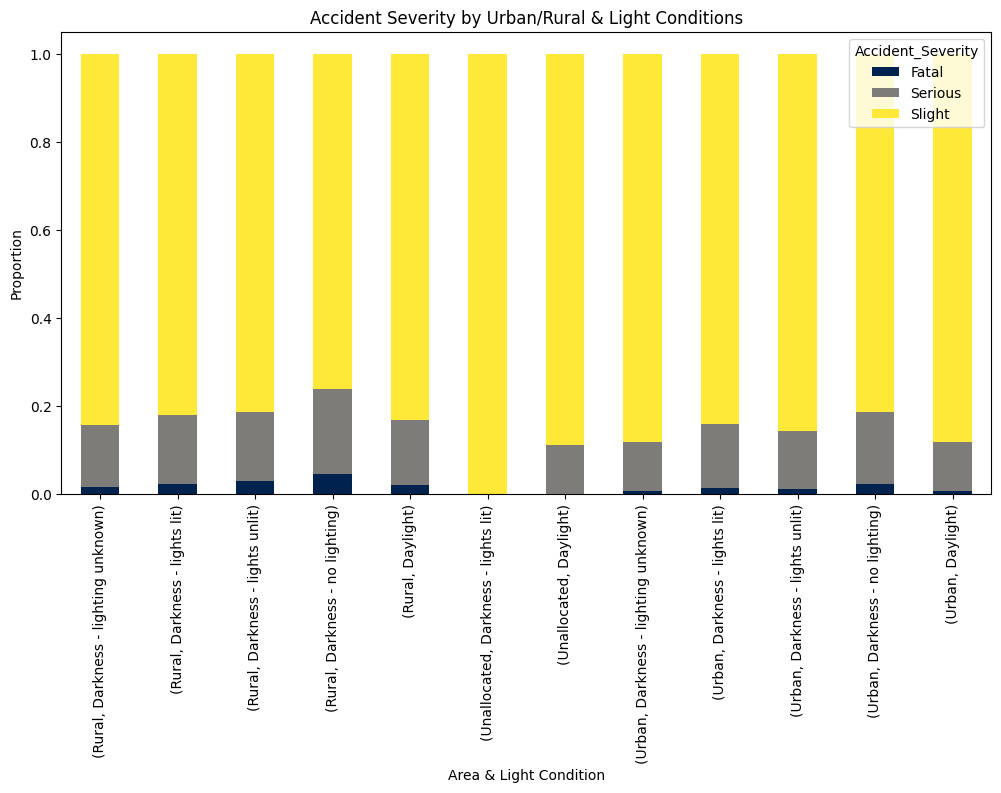

In [27]:
combo = pd.crosstab([blow["Urban_or_Rural_Area"], blow["Light_Conditions"]],
                    blow["Accident_Severity"], normalize="index")

combo.plot(kind="bar", stacked=True, figsize=(12,6), colormap="cividis")
plt.title("Accident Severity by Urban/Rural & Light Conditions")
plt.ylabel("Proportion")
plt.xlabel("Area & Light Condition")
plt.xticks(rotation=90)
plt.show()



Insight: Urban areas have more accidents overall, but rural night crashes are deadliest per accident, likely due to speed + poor visibility + delayed medical help.

16. How many accidents happened in flood conditions?

In [28]:
(blow["Road_Surface_Conditions"]=="Flood over 3cm. deep").sum()

np.int64(1017)

Insight: Only ~1,000 accidents were flood-related, very rare.

17. Rural roads have fewer accidents, but higher casualties per crash

In [29]:
blow.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].mean()

C:\Users\Admin\AppData\Local\Temp\ipykernel_1896\3827255675.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blow.groupby("Urban_or_Rural_Area")["Number_of_Casualties"].mean()


Urban_or_Rural_Area
Rural          1.479204
Unallocated    1.181818
Urban          1.287807
Name: Number_of_Casualties, dtype: float64

Insight: The average casualties per accident is higher in rural areas, meaning when an accident happens there, it tends to involve multiple victims.

18. Nighttime accidents are more likely to involve multiple vehicles

In [30]:
blow.groupby("Light_Conditions")["Number_of_Vehicles"].mean()


C:\Users\Admin\AppData\Local\Temp\ipykernel_1896\2103322937.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  blow.groupby("Light_Conditions")["Number_of_Vehicles"].mean()


Light_Conditions
Darkness - lighting unknown    1.758482
Darkness - lights lit          1.775498
Darkness - lights unlit        1.752654
Darkness - no lighting         1.599781
Daylight                       1.865385
Name: Number_of_Vehicles, dtype: float64

Insight: Night crashes average more vehicles involved compared to daylight, possibly due to visibility issues and chain collisions.

19. Do accidents with multiple vehicles cause more casualties than single-vehicle accidents?

In [31]:
sorgan= blow[blow["Number_of_Vehicles"] == 1]['Number_of_Casualties']
morgan = blow[blow["Number_of_Vehicles"] > 1]['Number_of_Casualties']

In [32]:
sorgan.sum()

np.int64(235108)

In [33]:
morgan.sum()

np.int64(661460)

Insight: Multiple vehicle accidents typically result in more fatalities than single vehicle accidents. This makes sense because more people tend to ride in many vehicles, which raises the number of fatalities.

20. Do accidents on wet road surfaces result in longer casualty chains compared to dry roads?

In [34]:
wet = blow[blow["Road_Surface_Conditions"].str.contains("Wet")]["Number_of_Casualties"]
dry = blow[blow["Road_Surface_Conditions"] == "Dry"]["Number_of_Casualties"]

In [35]:
wet.mean()

np.float64(1.4110643357542259)

In [36]:
dry.mean()

np.float64(1.3345446519539759)

Insights:
Although dry roads have more total accidents, wet surfaces lead to a higher average number of casualties per accident. Suggests slippery conditions may cause pile-ups.

21.Do urban single-carriageway roads produce more casualties per accident than rural ones?

In [37]:
urban_single = blow[(blow["Urban_or_Rural_Area"] == "Urban") & 
                      (blow["Road_Type"] == "Single carriageway")]["Number_of_Casualties"]

rural_single = blow[(blow["Urban_or_Rural_Area"] == "Rural") & 
                      (blow["Road_Type"] == "Single carriageway")]["Number_of_Casualties"]

In [38]:
urban_single.mean()

np.float64(1.27596507142399)

In [39]:
rural_single.mean()

np.float64(1.4750033974817274)

Insight:
Although urban areas have more total accidents, rural single-carriageway accidents show higher average casualties per crash, hinting that speed and emergency response times make rural crashes deadlier.

22. Do accidents in wet conditions involve more vehicles than in dry conditions?

In [40]:
dry = blow[blow["Road_Surface_Conditions"] == "Dry"]["Number_of_Vehicles"]
wet = blow[blow["Road_Surface_Conditions"] == "Wet or damp"]["Number_of_Vehicles"]

In [41]:
dry.mean()

np.float64(1.8416308658847345)

In [42]:
wet.mean()

np.float64(1.8291610429119267)

Insight:
Wet or damp road conditions tend to involve more vehicles per accident, suggesting chain collisions are more likely when the surface is slippery.

C:\Users\Admin\AppData\Local\Temp\ipykernel_1896\1826621814.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_severity = blow.groupby(['Weather_Conditions','Accident_Severity']).size().unstack().fillna(0)


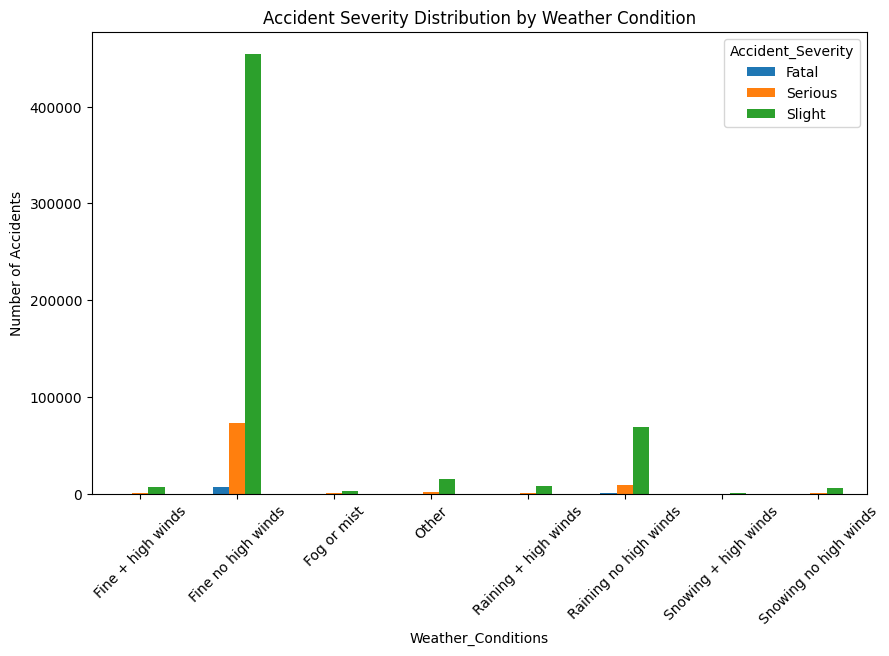

Accident_Severity,Fatal,Serious,Slight
Weather_Conditions,,,
Fine + high winds,175,1245,7134
Fine no high winds,7207,73285,454521
Fog or mist,82,483,2963
Other,165,1801,15184
Raining + high winds,145,1261,8209
Raining no high winds,848,9468,69380
Snowing + high winds,3,109,773
Snowing no high winds,36,565,5637


In [43]:
import matplotlib.pyplot as plt

weather_severity = blow.groupby(['Weather_Conditions','Accident_Severity']).size().unstack().fillna(0)

weather_severity.plot(kind='bar', figsize=(10,6))
plt.title("Accident Severity Distribution by Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)
plt.show()

weather_severity


23. Insights:
Most accidents happen during clear weather, not bad weather because drivers are on the road more often in good conditions, raising exposure.

24. Insights:
The risk per accident is higher in fog, snow, and heavy rain: a smaller share of total accidents but with a higher proportion of severe/fatal outcomes.

25. Insights:
This suggests that good weather increases accident frequency (volume-driven), while bad weather increases accident severity (impact-driven).

<h3> Data Visualization 6 QUESTIONS</h3>

26. Is the number of accidents higher on weekends than on weekdays?

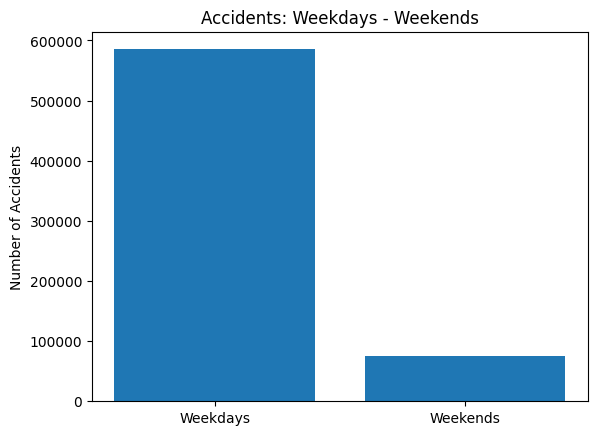

In [53]:
blow["Accident Date"] = pd.to_datetime(blow["Accident Date"], errors="coerce")

wend = blow[blow["Accident Date"].dt.day_name().isin(["Saturday","Sunday"])].shape[0]
wday = blow[~blow["Accident Date"].dt.day_name().isin(["Saturday","Sunday"])].shape[0]

plt.bar(["Weekdays","Weekends"], [wday, wend])
plt.title("Accidents: Weekdays - Weekends")
plt.ylabel("Number of Accidents")
plt.show()



Insight: There are more accidents on weekdays than on weekends.

27. In what way do accidents vary by day of the week from year to year?

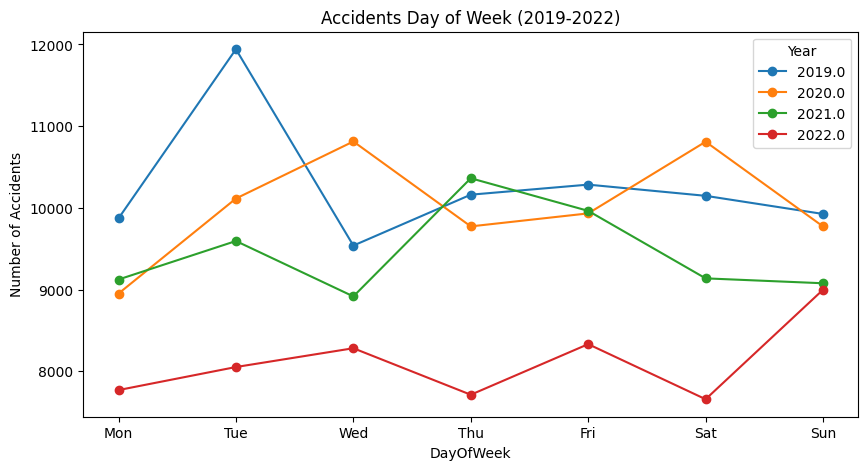

In [69]:

blow["Accident Date"] = pd.to_datetime(blow["Accident Date"], errors="coerce")
blow["Year"] = blow["Accident Date"].dt.year 
dow.plot(figsize=(10,5), marker='o')
plt.title("Accidents Day of Week (2019-2022)")
plt.xticks(range(7), ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
plt.ylabel("Number of Accidents")
plt.show()


Insight: Accidents are higher during weekdays, especially on Tuesday and Friday, and lower on weekends.

28. The district that experienced the highest accident count in 2019 is?

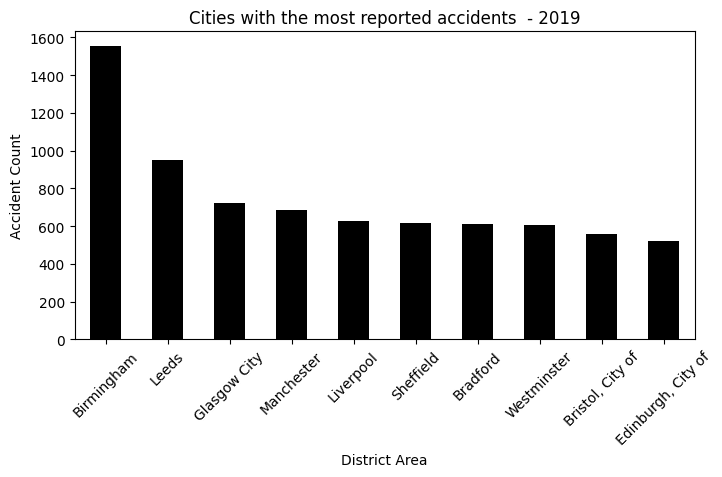

In [73]:
blow2019 = blow[blow["Accident Date"].dt.year == 2019]
cities = blow2019["District Area"].value_counts().head(10)

cities.plot(kind="bar", figsize=(8,4), color="black")
plt.title("Cities with the most reported accidents  - 2019")
plt.ylabel("Accident Count")
plt.xticks(rotation=45)
plt.show()


In [9]:
pip install folium

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import folium
from folium.plugins import HeatMap

Insight: In 2019, Birmingham recorded the highest number of accidents among all cities, followed by Leeds and Sheffield.

In [23]:
Leeds = blow[(blow['District Area'] == 'Leeds')]
Leeds.value_counts().sum()

np.int64(8785)

In [31]:
locations = list(zip(Leeds['Latitude'], Leeds['Longitude']))
m = folium.Map(location=[Leeds['Latitude'].mean(), Leeds['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)
m.save('Leeds_Heatmap.html')
m

29. The Leeds District heatmap indicates that there were 8,785 accidents overall.
 What sets this region apart, though, is that most collisions happen close to small residential roads rather than at busy intersections, suggesting that driver overconfidence on well-traveled routes may play a big role.
 In contrast, crashes tend to concentrate around high-traffic locations in most urban regions.

In [42]:
Nott = blow[(blow['District Area'] == 'Nottingham')]
Nott.value_counts().sum()

np.int64(3648)

In [43]:
locations = list(zip(Nott['Latitude'], Nott['Longitude']))
m = folium.Map(location=[Nott['Latitude'].mean(), Nott['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)
m.save('Nottingham_Heatmap.html')
m

30. Based on heatmap of Nottingham, there were 3,648 accidents in total. Most accident hotspots are found in parking lots and shopping areas, where tight spaces and frequent vehicle movements make low-speed collisions more likely.

In [36]:
Manchelster = blow[(blow['District Area'] == 'Manchester')]
Manchelster.value_counts().sum()

np.int64(6217)

In [40]:
locations = list(zip(Manchelster['Latitude'], Manchelster['Longitude']))
m = folium.Map(location=[Manchelster['Latitude'].mean(), Manchelster['Longitude'].mean()], zoom_start=10)
HeatMap(locations).add_to(m)
m.save('Manchester_Heatmap.html')
m

31. Based on heatmap of Manchester, there were 6,217 recorded accidents. Most hotspots are found along public transport routes and busy pedestrian intersections.
